In [15]:
from webbrowser import BaseBrowser
import pandas as pd
import os

benchmarkVersion = "test-all-2025-09-23"

rootDir = "/workspaces/promptpex/"

if not os.path.isdir(rootDir):
    rootDir = "../"

evalsDir = f'{rootDir}/evals/{benchmarkVersion}/'

benchmarks = [ "speech-tag"]

# full set
benchmarks = [ "speech-tag", "classify-input-text", "text-to-p",  "sentence-rewrite", "extract-names", "elements", "art-prompt", "shakespearean-writing-assistant"]
# benchmarks = [ "speech-tag", "text-to-p",  "sentence-rewrite", "extract-names", "elements", "art-prompt", "shakespearean-writing-assistant"]

# benchmarks = [ "speech-tag", "classify-input-text", "text-to-p",  "sentence-rewrite", "elements", "art-prompt", "shakespearean-writing-assistant"]


#benchmarks = [ "speech-tag", "text-to-p", "elements", "extract-names", ]

#benchmarks = [  "speech-tag", "text-to-p",  ]

#benchmarks = [ "speech-tag",  ]

#benchmarks = [ "speech-tag", "text-to-p",  "sentence-rewrite", "extract-names", "elements", "art-prompt",  "shakespearean-writing-assistant"]

#benchmarks = [ "speech-tag", "text-to-p", "sentence-rewrite", "extract-names", "elements", "art-prompt", "classify-input-text"   ]
# benchmarks = [ "speech-tag", "text-to-p", "sentence-rewrite", "extract-names", "elements",    ]
#benchmarks = [ "speech-tag", "text-to-p", ]


prettyNames = { "speech-tag": "speech-tag", 
                "text-to-p": "text-to-p",  
                "shakespearean-writing-assistant": "shakespeare", 
                "sentence-rewrite": "sentence", 
                "extract-names": "extract-names", 
                "elements":"elements", 
                "art-prompt": "art-prompt", 
                "classify-input-text": "classify"}

benchmarks = [
    "bayesian_games_29_7",
    "bullet_journaling_145_1",
    "canopy_management_298_8",
    "fancy_title_generator",
    "hearing_impairments_124_7",
    "housing_market_dynamics_338_1",
    "initial_public_offerings_ipos_70_9",
    "news_broadcasting_693_9",
    "prompt_generator",
    "real_time_analytics_609_2",
    "recruiter",
    "restaurant_owner",
    "sewing_951_7",
    "solr_search_engine",
    "speaker_identification_595_2",
    "startup_idea_generator",
    "tea_taster",
    "virtual_fitness_coach",
    "yes_or_no_answer",
    "speech-tag", "classify-input-text", "text-to-p",  "sentence-rewrite", "extract-names", "elements", "art-prompt", "shakespearean-writing-assistant",
"modular_arithmetic_26_4",
"sleep_hygiene_174_3",
"supply_chain_risk_management_347_8",
"supporting_homework_and_study_habits_547_7",
"decentralized_finance_defi_937_2",
"fashion_brand_marketing_strategies_889_3",
"kombucha_brewing_479_10",
"smart_security_systems_554_2",
"autism_spectrum_disorder_124_2",
"sleep_hygiene_practices_163_4",
"virtual_fitness_coach",
"dentist",
"personal_stylist",
"developer_relations_consultant",
"biblical_translator",
"ai_assisted_doctor",
"web_design_consultant",
"public_speaking_coach",
"buddha",
"screenwriter",
]

benchmarks = [
"startup_idea_generator",
"tea_taster",
"recruiter",
"yes_or_no_answer",
"virtual_fitness_coach",
"fancy_title_generator",
"restaurant_owner",
"prompt_generator",
"solr_search_engine",
"sewing_951_7",
"hearing_impairments_124_7",
"speaker_identification_595_2",
] 

benchmarks = [ "speech-tag", "classify-input-text", "text-to-p",  "sentence-rewrite", "extract-names", "elements", "art-prompt", 
"sewing_951_7",
"hearing_impairments_124_7",
"speaker_identification_595_2",
"real_time_analytics_609_2",
"housing_market_dynamics_338_1",]

benchmarks = [ "speech-tag",  ]

### Add proper columns to the dataframe

data = {}
comp_val = {}
base_comp_val = {}
pos_comp_val = {}
neg_comp_val = {}

for benchmark in benchmarks:
    print("benchmark: ", benchmark)
    data[benchmark] = pd.read_csv(f'{evalsDir}/{benchmark}/{benchmark}/overview.csv')
    db = data[benchmark]

    if "tests negative" in db.columns:
        if db["tests negative"][0] == 0:
            print("No negative tests for: ", benchmark)
    else:
        db["tests negative"] = 0
        
    db["compliant %"] = [float(p.strip('%')) / 100 for p in db["tests compliant"]]
    # db["compliant %"] = 0
    # Check if "baseline compliant" column exists before using it
    if "baseline compliant" in db.columns:
        db["baseline %"] = [float(p.strip('%')) / 100 for p in db["baseline compliant"]]
    else:
        db["baseline %"] = 0
    db["pos rule %"] = db["tests positive compliant"] / db["tests positive"]
    db["neg rule %"] = db["tests negative compliant"] / db["tests negative"]
    db["valid test %"] = db["tests valid"] / db["tests"]
    # db["pos rule %"] = 0
    # db["neg rule %"] = 0
    # db["valid test %"] = 0
    
    comp_val[benchmark] = db["compliant %"]
    base_comp_val[benchmark] = db["baseline %"]
    pos_comp_val[benchmark] = db["pos rule %"]
    neg_comp_val[benchmark] = db["neg rule %"]

    
    print(db["compliant %"])
    print(db["baseline %"])
    print(db["pos rule %"])
    print(db["neg rule %"])
    print(db["valid test %"])


# zero out the sum
n_models = len(data[benchmarks[0]]["model"])
comp_val["sum"] = [0 for i in range(n_models)]
base_comp_val["sum"] = [0 for i in range(n_models)]
pos_comp_val["sum"] = [0 for i in range(n_models)]
neg_comp_val["sum"] = [0 for i in range(n_models)]

# sum up the values across the benchmarks
for key in comp_val:
    if (key != "sum"):
        print("key:", key)
        comp_val["sum"] = comp_val["sum"] + comp_val[key]
        base_comp_val["sum"] = base_comp_val["sum"] + base_comp_val[key]
        pos_comp_val["sum"] = pos_comp_val["sum"] + pos_comp_val[key]
        neg_comp_val["sum"] = neg_comp_val["sum"] + neg_comp_val[key]
        # print('neg_comp_val["sum"]', neg_comp_val["sum"])

# calculate the mean
#print('comp_val["sum"]', comp_val["sum"])
comp_val["mean"] = comp_val["sum"]/len(benchmarks)
#print('comp_val["mean"]', comp_val["mean"])
base_comp_val["mean"] = base_comp_val["sum"]/len(benchmarks)
pos_comp_val["mean"] = pos_comp_val["sum"]/len(benchmarks)
#print('neg_comp_val["sum"]', neg_comp_val["sum"])
neg_comp_val["mean"] = neg_comp_val["sum"]/len(benchmarks)
#print('neg_comp_val["mean"]', neg_comp_val["mean"])
    
    
###############################################################################
### Generate graphs from the data


### Generate a csv with the non compliance % per benchmark for promptpex
###
    
with open(f'{evalsDir}/pp-cpct.csv', 'w') as cfile:
    print("Benchmark,", end="", file=cfile)
    # just need the model names from the first benchmark
    db = data[benchmarks[0]] 
    print(', '.join(map(str, db["model"])), file=cfile)
        
    for benchmark in benchmarks:
        name = prettyNames.get(benchmark, benchmark)
        print(name, ",", end="", file=cfile)
        db = data[benchmark]
        print(', '.join(map(str, (1-db["compliant %"]))), file=cfile)
    
    print("average", ",", end="", file=cfile)
    print(', '.join(map(str, (1-comp_val["mean"]))), file=cfile)

### Generate a csv with the test validity per benchmark for promptpex
###
  
with open(f'{evalsDir}/pp-test-validity.csv', 'w') as cfile:
    print("Benchmark, tests, valid tests", file=cfile)
        
    for benchmark in benchmarks:
        name = prettyNames.get(benchmark, benchmark)
        db = data[benchmark]
        print(f'{name},{db["tests"][0]}, {db["tests valid"][0]}', file=cfile)

### Generate a csv comparing positive and negative compliance per model and benchmark for promptpex
###

with open(f'{evalsDir}/pos-neg-cpct.csv', 'w') as cfile:
    
    models = data[benchmarks[0]]["model"]
    pos_sum = [0 for i in range(len(models))]
    neg_sum = [0 for i in range(len(models))]    
    
    print("Model, Rule % Non-Compliance, Inv Rule % Non-Compliance", file=cfile)

    for b in benchmarks:
        db = data[b]
        # print(f'benchmark:{benchmark}, {db["neg rule %"]}')
        pos_sum += db["pos rule %"]
        neg_sum += db["neg rule %"]
            
    for m, psum, nsum in zip(models, pos_sum, neg_sum):
        print(m, ",", (1-psum/len(benchmarks)), ",", (1-nsum/len(benchmarks)), file=cfile)
        
    #print("average", ",", end="", file=cfile)
    #print(pos_comp_val["mean"], ",", neg_comp_val["mean"], file=cfile)

### Generate a csv with the average compliance of promptpex versus baseline
# each row is a model
# each column is a method (pp vs baseline)

with open(f'{evalsDir}/pp-compare.csv', 'w') as cfile:
    
    models = data[benchmarks[0]]["model"]
    pp_sum = [0 for i in range(len(models))]
    bl_sum = [0 for i in range(len(models))]    
    
    print("Model, PromptPex % Non-Compliance, Baseline % Non-Compliance", file=cfile)

    for b in benchmarks:
        db = data[b]
        #print(db["pos rule %"])
        pp_sum += db["compliant %"]
        bl_sum += db["baseline %"]
            
    for m, psum, bsum in zip(models, pp_sum, bl_sum):
        print(m, ",", (1-psum/len(benchmarks)), ",", (1-bsum/len(benchmarks)), file=cfile)


benchmark:  speech-tag
0    0.83
1    0.89
2    0.94
3    0.00
Name: compliant %, dtype: float64
0    0
1    0
2    0
3    0
Name: baseline %, dtype: int64
0    1.000000
1    0.777778
2    1.000000
3    0.000000
Name: pos rule %, dtype: float64
0    0.666667
1    1.000000
2    0.888889
3    0.000000
Name: neg rule %, dtype: float64
0    1.0
1    1.0
2    1.0
3    1.0
Name: valid test %, dtype: float64
key: speech-tag


In [16]:
### Extract out number of rules and grounded rules per benchmark

import os

grules = {}

if True:
    with open(f'{evalsDir}/pp-grounded-rules.csv', 'w') as cfile:
        print(f"benchmark, rules, grounded rules", file=cfile)
        for benchmark in benchmarks:
            # Read the rules.txt file and count lines
            rules_file_path = f'{evalsDir}/{benchmark}/{benchmark}/rules.txt'
            if os.path.exists(rules_file_path):
                with open(rules_file_path, 'r') as file:
                    lines = file.readlines()
                    # Count non-empty lines
                    rule_count = len([line for line in lines if line.strip()])
            else:
                rule_count = 0
                print(f"Warning: {rules_file_path} not found")
            
            name = prettyNames.get(benchmark, benchmark)
            # Using rule_count for both rules and grounded rules since we're just counting lines
            print(f"{name}, {rule_count}, {rule_count}", file=cfile)

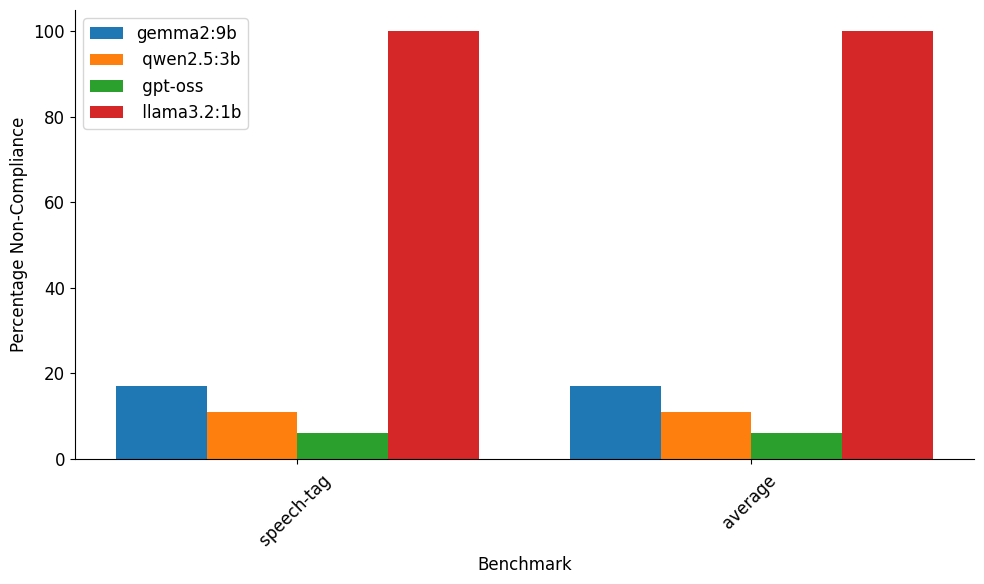

In [17]:
import matplotlib.pyplot as plt
import numpy as np


plt.rcParams.update({'font.size': 12}) 
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

# Load the CSV file into a DataFrame
df = pd.read_csv(f'{evalsDir}/pp-cpct.csv')

# Remove the 'average' row if present
df = df[df['Benchmark'] != 'average']

# Set the 'Benchmark' column as the index
df.set_index('Benchmark', inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Number of benchmarks
n_benchmarks = len(df.index)
# Number of models
n_models = len(df.columns)

# Bar width
bar_width = 0.2

# Positions of the bars on the x-axis
indices = np.arange(n_benchmarks)

# Plot each model's bars
for i, model in enumerate(df.columns):
    ax.bar(indices + i * bar_width, df[model] * 100, bar_width, label=model)

# Set the x-axis labels
ax.set_xticks(indices + bar_width * (n_models - 1) / 2)
ax.set_xticklabels(df.index, rotation=45, ha='center')

# Set labels and title
ax.set_xlabel('Benchmark')
ax.set_ylabel('Percentage Non-Compliance')
# ax.set_title('Clustered Bar Chart of Benchmark % Non-Compliance by Model')
ax.legend()

# Show the plot
plt.tight_layout()
plt.savefig(f'{evalsDir}/pp-cpct.pdf')
plt.show()

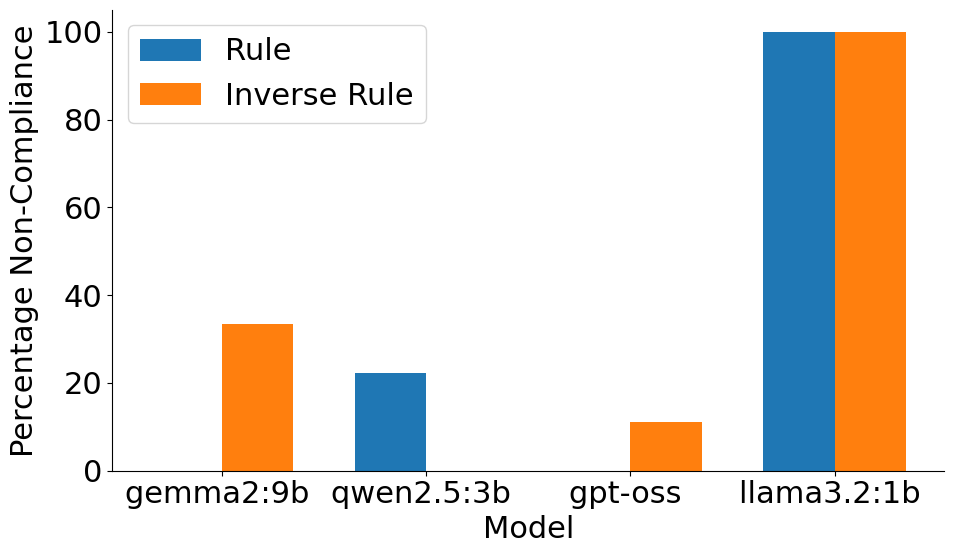

In [18]:
# Load the CSV file into a DataFrame
df = pd.read_csv(f'{evalsDir}/pos-neg-cpct.csv')
plt.rcParams.update({'font.size': 22}) 
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.35

# Positions of the bars on the x-axis
indices = range(len(df))

# Plot each compliance type's bars
ax.bar(indices, df[' Rule % Non-Compliance'] * 100, bar_width, label='Rule')
ax.bar([i + bar_width for i in indices], df[' Inv Rule % Non-Compliance'] * 100, bar_width, label='Inverse Rule')

# Set the x-axis labels
ax.set_xticks([i + bar_width / 2 for i in indices])
ax.set_xticklabels(df['Model'], rotation=0, ha='center')

# Set labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Percentage Non-Compliance')
# ax.set_title('Rule % Non-Compliance and Inverse Rule % Non-Compliance by Model')
ax.legend()

# Show the plot
plt.tight_layout()
plt.savefig(f'{evalsDir}/pos-neg-cpct.pdf')
plt.show()

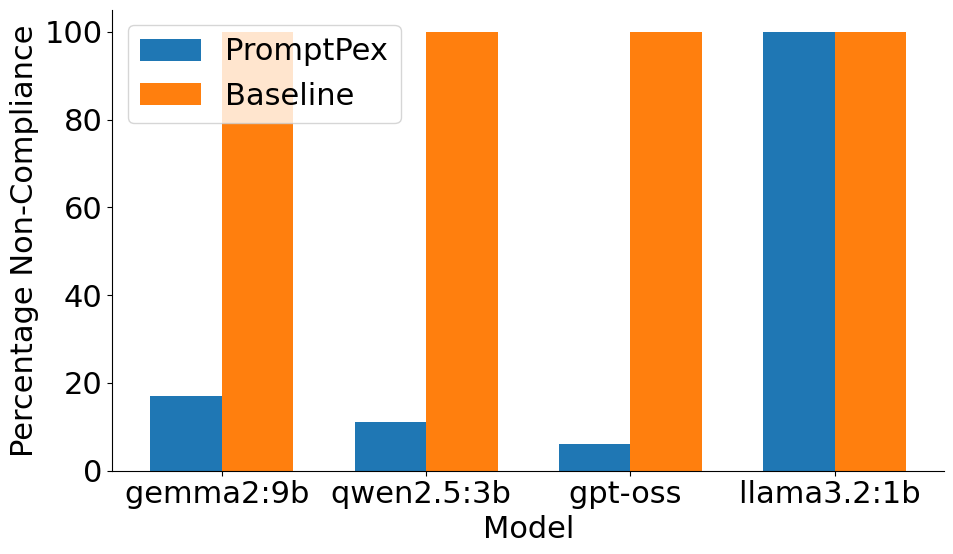

In [19]:
# Load the CSV file into a DataFrame
df = pd.read_csv(f'{evalsDir}/pp-compare.csv')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.35

# Positions of the bars on the x-axis
indices = range(len(df))

# Plot each compliance type's bars
ax.bar(indices, df[' PromptPex % Non-Compliance'] * 100, bar_width, label='PromptPex')
ax.bar([i + bar_width for i in indices], df[' Baseline % Non-Compliance'] * 100, bar_width, label='Baseline')

# Set the x-axis labels
ax.set_xticks([i + bar_width / 2 for i in indices])
ax.set_xticklabels(df['Model'], rotation=0, ha='center')

# Set labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Percentage Non-Compliance')
# ax.set_title('PromptPex % Non-Compliance and Baseline % Non-Compliance by Model')
ax.legend()

# Show the plot
plt.tight_layout()
plt.savefig(f'{evalsDir}/pp-compare.pdf')
plt.show()

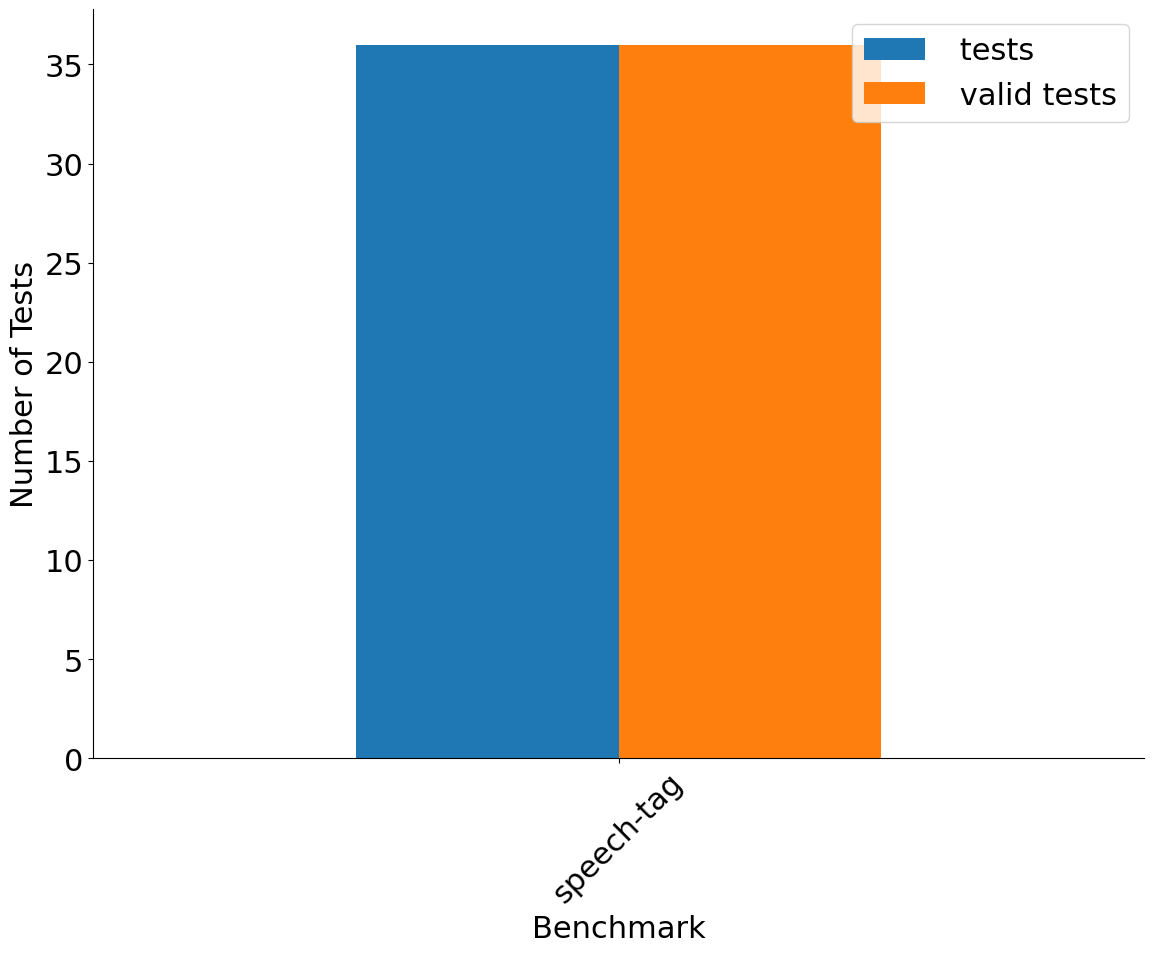

In [20]:
# Read the CSV file
df = pd.read_csv(f'{evalsDir}/pp-test-validity.csv')

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 10))
df.plot(kind='bar', x='Benchmark', ax=ax)
ax.set_ylabel('Number of Tests')
# ax.set_title('PromptPex Tests vs Valid Tests by Benchmark')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.savefig(f'{evalsDir}/pp-test-validity.pdf')
plt.show()

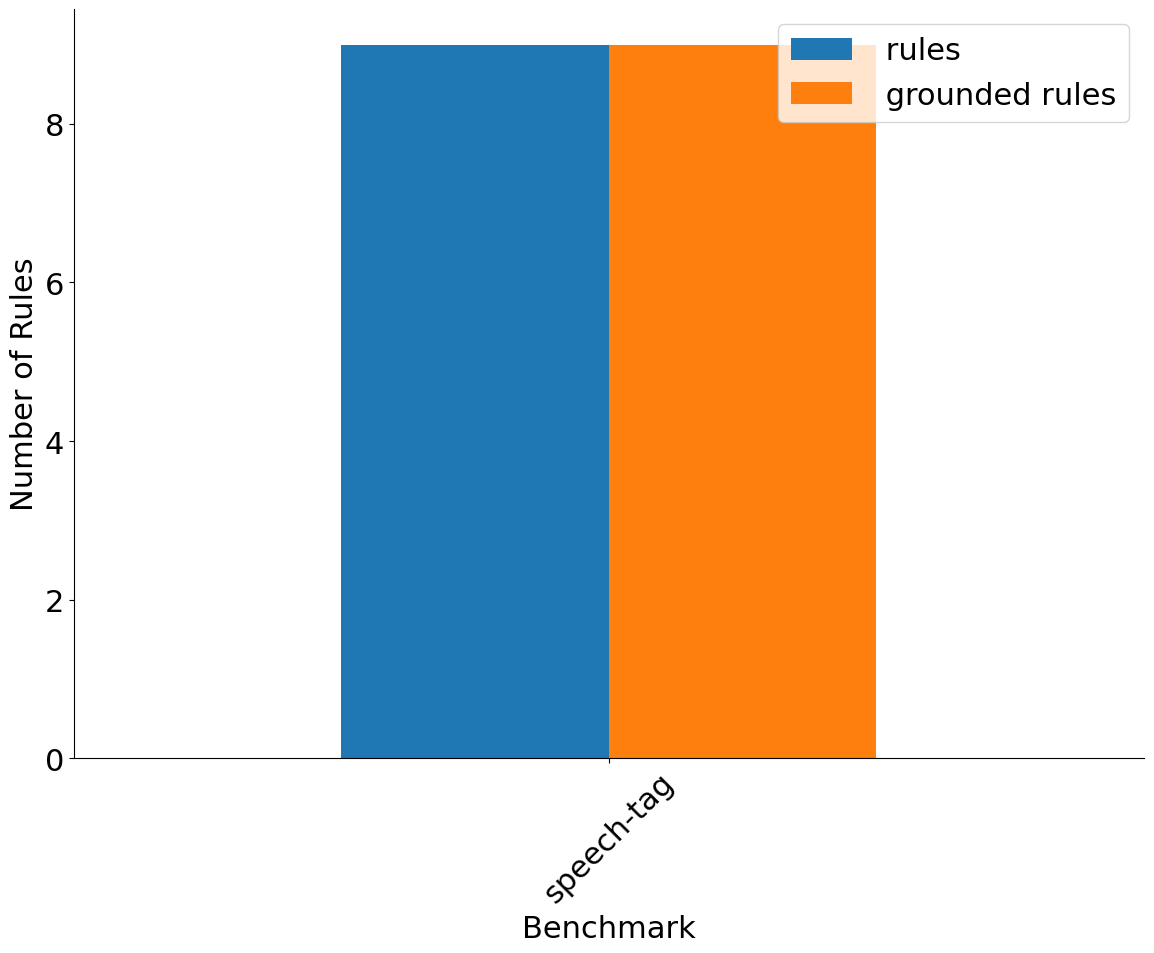

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
if True:
    df = pd.read_csv(f'{evalsDir}/pp-grounded-rules.csv')

    # Plot the bar chart
    fig, ax = plt.subplots(figsize=(12, 10))
    df.plot(kind='bar', x='benchmark', ax=ax)
    ax.set_xlabel('Benchmark')
    ax.set_ylabel('Number of Rules')
    #ax.set_title('PromptPex Rules vs Grounded Rules by Benchmark')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show plot
    plt.savefig(f'{evalsDir}/pp-grounded-rules.pdf')
    plt.show()